In [1]:
from osgeo import gdal, gdalnumeric, ogr, osr
from PIL import Image, ImageDraw
import sys, os
from osgeo import gdal_array
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def NDVI(Nirfile,Redfile):
   #NDVI= (NIR-R)/(NIR+R)
   nir_array_as32 = Nirfile.astype(np.float32) # Convert the np arrays to 32-bit floating point.
   red_array_as32 = Redfile.astype(np.float32)
   np.seterr(divide='ignore', invalid='ignore') #Tell numpy not to complain about division by 0:
   ndvi = (nir_array_as32 - red_array_as32)/(nir_array_as32 + red_array_as32)
   ndvi_image = np.ma.masked_invalid(ndvi) #filtro los valores Nan e Inf para calcular la media
   np.warnings.filterwarnings('ignore')# leave Nan values
   print (np.min(ndvi_image)) 
   print (np.max(ndvi_image)) 
   print (np.mean(ndvi_image)) 
   return ndvi_image 

In [3]:
def mostrar (image):
   im2 = plt.imshow(image, cmap='RdYlGn')
   cb = plt.colorbar(im2)
   plt.title('Resultado')
   #plt.colorbar()
   cb.set_label('Valores de índice')
   plt.show()

<class 'osgeo.gdal.Dataset'>
<class 'numpy.ndarray'>
-1.2941177
1.1194401
0.09615714591040331


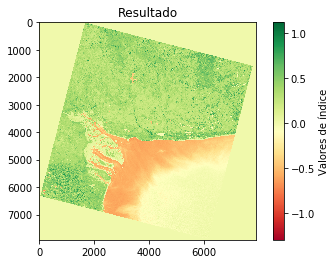

In [4]:
b4 = r"E:\Imágenes Satelitales\2017\226_87\BA22687 18dic2017\LC08_L1TP_226087_20171218_20171224_01_T1_sr_band4.tif"
b5 = r"E:\Imágenes Satelitales\2017\226_87\BA22687 18dic2017\LC08_L1TP_226087_20171218_20171224_01_T1_sr_band5.tif"





#b4 = r"H:\LANDSAT8_2017_2018_2019\Img_pruebas_Merge226_86_227_86\2019_merge\6ene_14feb\B4_merged2.tif"
#b5 = r"H:\LANDSAT8_2017_2018_2019\Img_pruebas_Merge226_86_227_86\2019_merge\6ene_14feb\B5_merged.tif"
band4 = gdal.Open(b4, gdal.GA_ReadOnly)
band5 = gdal.Open(b5, gdal.GA_ReadOnly)

red_array = band4.ReadAsArray()
nir_array = band5.ReadAsArray()
print(type(band4))
print(type(red_array))
ndvi_image=NDVI(nir_array,red_array)
mostrar(ndvi_image)


In [8]:
ndvi_image

masked_array(
  data=[[-0.0, -0.0, -0.0, ..., -0.0, -0.0, -0.0],
        [-0.0, -0.0, -0.0, ..., -0.0, -0.0, -0.0],
        [-0.0, -0.0, -0.0, ..., -0.0, -0.0, -0.0],
        ...,
        [-0.0, -0.0, -0.0, ..., -0.0, -0.0, -0.0],
        [-0.0, -0.0, -0.0, ..., -0.0, -0.0, -0.0],
        [-0.0, -0.0, -0.0, ..., -0.0, -0.0, -0.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20,
  dtype=float32)